## Network Analysis of the Shelby County Transportation Network

In [1]:
import osmnx as ox
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import networkx as nx
import pandas as pd

This Jupyter Notebook showcases an example of how we can use the osmnx library to access the OpenStreetMap API through a python script and load the data for any specific region of interest. After the raw data has been loaded, it is passed through a post-processing step wherein unwanted links are removed, the orphaned nodes are filtered out, and a cleaned graph object is generated. Finally, the nodes and links of the cleaned graph objects are saved as shapefiles, so that they can be reused later in a separate Python script or loaded into a GIS software for further analysis.

Read more on the OSMNX documentation here: https://osmnx.readthedocs.io/en/stable/

In [2]:
# Step 1: Get boundary of Shelby County
shelby_county = ox.geocode_to_gdf("Shelby County, Tennessee, USA")

# Step 2: Download the street network within the county boundary
G = ox.graph_from_polygon(shelby_county.geometry.values[0], network_type="drive")

# Step 3: Convert to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

Note that the above step enables by osmnx significantly simplifies the process of downloading the OpenStreetMap data separately in xml format, loading them into a script, load a separate boundary file, and clip the downloaded OSM data within the boundary before converting them to the required format (networkx graph object or shapefiles.)

In [3]:
nodes

,y,x,highway,street_count,ref,railway,geometry
osmid,,,,,,,
124896077,34.994487,-89.830784,traffic_signals,4,NaN,NaN,POINT (-89.83078 34.99449)
124896180,34.994391,-89.883775,NaN,3,NaN,NaN,POINT (-89.88377 34.99439)
124896187,34.994423,-89.886984,NaN,3,NaN,NaN,POINT (-89.88698 34.99442)
124896192,34.994469,-89.891707,NaN,3,NaN,NaN,POINT (-89.89171 34.99447)
124896196,34.994509,-89.893422,turning_loop,1,NaN,NaN,POINT (-89.89342 34.99451)
...,...,...,...,...,...,...,...
12706749414,35.259048,-89.659928,NaN,3,NaN,NaN,POINT (-89.65993 35.25905)
12706749418,35.259043,-89.659646,NaN,3,NaN,NaN,POINT (-89.65965 35.25904)
12706771501,35.342524,-89.786490,NaN,3,NaN,NaN,POINT (-89.78649 35.34252)


In [4]:
edges

osmid      highway lanes  \
u           v           key                                              
124896077   1719365010  0                 143031521     tertiary     2   
            1719365006  0    [346673201, 955644726]      primary     7   
124896180   124896187   0                  13574284  residential     2   
            6304459899  0                 107382636     tertiary     2   
124896187   124896192   0                  13574284  residential     2   
...                                             ...          ...   ...   
12706771501 203624440   0                  85788762  residential     2   
12706775461 11401425259 0                1229501900  residential   NaN   
            203949122   0    [19656729, 1229501900]  residential   NaN   
            12706775467 0                1372298545  residential   NaN   
12706775467 12706775461 0                1372298545  residential   NaN   

                            maxspeed               name  oneway reversed  \
u           v           key                                                
124896077   1719365010  0     40 mph    State Line Road   False    False   
            1719365006  0     45 mph     Riverdale Road   False    False   
124896180   124896187   0        NaN  Cedar Ridge Drive   False    False   
            6304459899  0        NaN      Davidson Road   False     True   
124896187   124896192   0        NaN  Cedar Ridge Drive   False    False   
...                              ...                ...     ...      ...   
12706771501 203624440   0        NaN       Donnell Road   False     True   
12706775461 11401425259 0        NaN                NaN   False    False   
            203949122   0        NaN     Field Oak Road   False     True   
            12706775467 0        NaN                NaN   False    False   
12706775467 12706775461 0        NaN                NaN   False     True   

                                  length  \
u           v           key                
124896077   1719365010  0     314.231970   
            1719365006  0     306.047107   
124896180   124896187   0     292.360043   
            6304459899  0     645.922606   
124896187   124896192   0     430.267370   
...                                  ...   
12706771501 203624440   0    3836.697422   
12706775461 11401425259 0      96.187457   
            203949122   0     337.666539   
            12706775467 0     239.287156   
12706775467 12706775461 0     239.287156   

                                                                      geometry  \
u           v           key                                                      
124896077   1719365010  0    LINESTRING (-89.83078 34.99449, -89.82975 34.9...   
            1719365006  0    LINESTRING (-89.83078 34.99449, -89.83079 34.9...   
124896180   124896187   0    LINESTRING (-89.88377 34.99439, -89.88389 34.9...   
            6304459899  0    LINESTRING (-89.88377 34.99439, -89.88385 34.9...   
124896187   124896192   0    LINESTRING (-89.88698 34.99442, -89.88721 34.9...   
...                                                                        ...   
12706771501 203624440   0    LINESTRING (-89.78649 35.34252, -89.78646 35.3...   
12706775461 11401425259 0    LINESTRING (-89.91616 35.34394, -89.91512 35.3...   
            203949122   0    LINESTRING (-89.91616 35.34394, -89.91746 35.3...   
            12706775467 0    LINESTRING (-89.91616 35.34394, -89.91593 35.3...   
12706775467 12706775461 0    LINESTRING (-89.9164 35.34582, -89.91626 35.34...   

                             ref bridge access area tunnel junction  
u           v           key                                          
124896077   1719365010  0    NaN    NaN    NaN  NaN    NaN      NaN  
            1719365006  0    NaN    NaN    NaN  NaN    NaN      NaN  
124896180   124896187   0    NaN    NaN    NaN  NaN    NaN      NaN  
            6304459899  0    NaN    NaN    NaN  NaN    NaN      NaN  
124896187   124896192   0    NaN  

Note the format of the edges geodataframe, which is a MultiIndex format. This means that the dataframe is not indexed by a single variable, but 3 variables together: ['u', 'v', 'key']

Here is a plot of how the war network as downloaded looks like

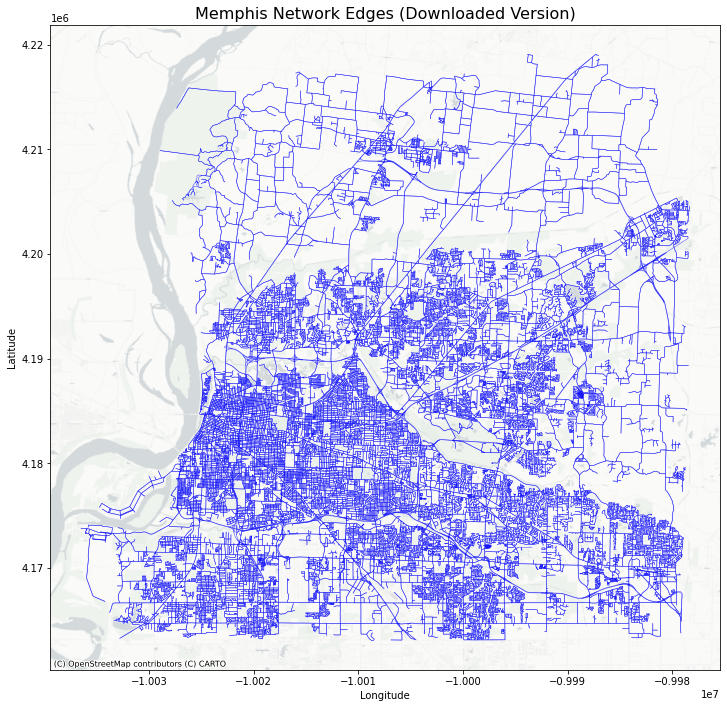

In [5]:
# Plot using GeoPandas
fig, ax = plt.subplots(figsize=(12, 12))

# Reproject nodes and edges to Web Mercator (EPSG:3857)
nodes = nodes.to_crs(epsg=3857)
edges = edges.to_crs(epsg=3857)

# Plot edges (roads)
edges.plot(ax=ax, linewidth=0.5, edgecolor="blue", alpha=0.7)

# # Plot nodes (intersections)
# nodes.plot(ax=ax, markersize=5, color="red", alpha=0.7)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)

plt.title("Memphis Network Edges (Downloaded Version)", fontsize = 16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

We already see that we have too many links, probably more than we need to perform network analysis. A way to check the links we have in the dataset is to check how many links of ach type we have. It is entirely possible that we can eliminate some types of links.

In [6]:
edges['highway'].value_counts()

highway
residential                     71190
tertiary                         9931
secondary                        8580
primary                          3688
unclassified                     1691
motorway_link                     760
trunk                             487
motorway                          319
primary_link                      315
secondary_link                    261
trunk_link                        142
tertiary_link                      96
living_street                      44
[tertiary, residential]            28
[residential, unclassified]        24
[unclassified, residential]        24
residential_link                   16
[tertiary, secondary]               5
[secondary, tertiary]               5
[motorway_link, motorway]           4
[tertiary, unclassified]            2
[residential, primary]              2
[residential, living_street]        2
[primary, motorway]                 1
[secondary, primary_link]           1
[trunk, primary]                    1
Name

You can read more about the descriptions of each type of link here: https://wiki.openstreetmap.org/wiki/Key:highway

We can only keep the top 5 most important link categories: motorways, trunk, primary, secondary, and tertiary highways. However, you can select more or less than this if you prefer for your specific analysis.

In [7]:
# Define funtion to filter highways by class
def filter_highways(hw):
    if isinstance(hw, list):
        # Here, you can add/remove features depending on how much you want to keep
        return any(h in ['motorway', 'trunk', 'primary', 'secondary', 'tertiary'] for h in hw)
    else:
        # Here, you can add/remove features depending on how much you want to keep
        return hw in ['motorway', 'trunk', 'primary', 'secondary', 'tertiary']

# Apply filter
filtered_edges = edges[edges['highway'].apply(filter_highways)]

# Step 1: Extract u, v from the MultiIndex
filtered_edges['u'] = filtered_edges.index.get_level_values(0)
filtered_edges['v'] = filtered_edges.index.get_level_values(1)

# STEP 2: Get the unique node IDs that remain after filtering
# Extract u and v columns from filtered edges
valid_nodes = set(filtered_edges['u']).union(set(filtered_edges['v']))

# STEP 3: Filter nodes to only those present in the filtered edges
filtered_nodes = nodes.loc[nodes.index.isin(valid_nodes)].copy()

# STEP 4: Rebuild the graph from the filtered nodes and edges
G_filtered = ox.graph_from_gdfs(filtered_nodes, filtered_edges)

# OPTIONAL STEP 6: Retain only the largest connected component
G_clean = max(nx.connected_components(G_filtered.to_undirected()), key=len)
G_clean = G_filtered.subgraph(G_clean).copy()

/home/jupyter/.local/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/jupyter/.local/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/jupyter/.local/lib/python3.9/site-packages/osmnx/convert.py:302: UserWarning: Discarding the `gdf_nodes` 'geometry' column, though its values differ from the coordinates in the 'x' and 'y'

Next, we extract the nodes and edges from the cleaned graph object using the osmnx function that we had used previously.

In [8]:
# Convert to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(G_clean)

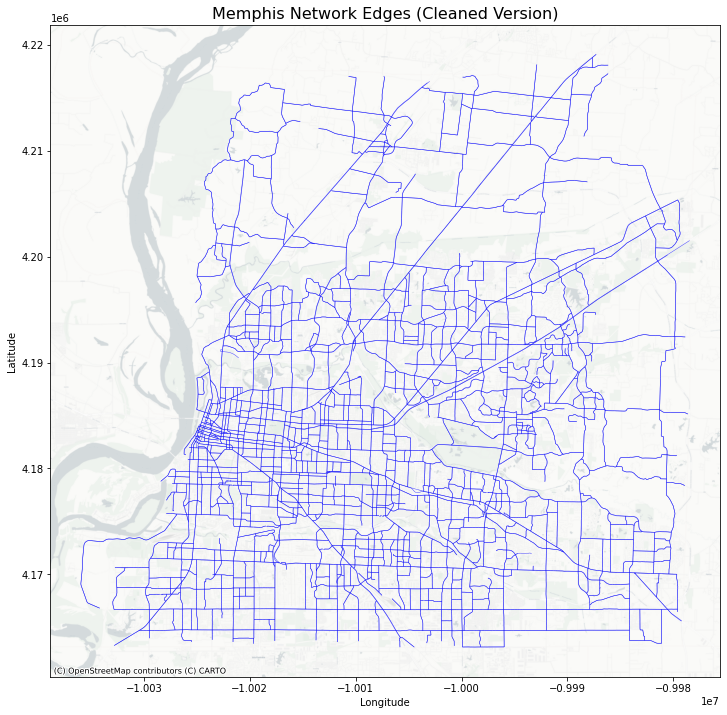

In [9]:
# Plot using GeoPandas
fig, ax = plt.subplots(figsize=(12, 12))

# Plot edges (roads)
edges.plot(ax=ax, linewidth=0.5, edgecolor="blue", alpha=0.7)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)

plt.title("Memphis Network Edges (Cleaned Version)", fontsize = 16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [10]:
nodes

,y,x,highway,street_count,railway,ref,geometry
osmid,,,,,,,
124896077,34.994487,-89.830784,traffic_signals,4,NaN,NaN,POINT (-89.831 34.994)
1719365010,34.994530,-89.827335,NaN,3,NaN,NaN,POINT (-89.827 34.995)
1719365006,34.997239,-89.830797,NaN,3,NaN,NaN,POINT (-89.831 34.997)
124896180,34.994391,-89.883775,NaN,3,NaN,NaN,POINT (-89.884 34.994)
6304459899,35.000101,-89.884309,NaN,3,NaN,NaN,POINT (-89.884 35)
...,...,...,...,...,...,...,...
11668829770,35.256647,-89.848258,NaN,4,NaN,NaN,POINT (-89.848 35.257)
11668829783,35.256369,-89.845591,NaN,4,NaN,NaN,POINT (-89.846 35.256)
11668829835,35.256292,-89.844396,NaN,3,NaN,NaN,POINT (-89.844 35.256)


In [11]:
edges

osmid    highway   lanes  \
u           v           key                                                
124896077   1719365010  0                   143031521   tertiary       2   
            1719365006  0      [346673201, 955644726]    primary       7   
1719365010  2470314265  0                   143031521   tertiary       2   
            124896077   0                   143031521   tertiary       2   
1719365006  203668190   0                   346673201    primary       7   
...                                               ...        ...     ...   
11668829770 11668829783 0                  1255219056  secondary       2   
11668829783 11668829835 0                  1255219056  secondary       2   
11668829835 11668829787 0    [1255219056, 1255219059]  secondary  [3, 2]   
11668829824 10119537761 0                  1255219047  secondary       2   
12425939726 2875548831  0                  1343006704   tertiary       2   

                            maxspeed                  name  oneway reversed  \
u           v           key                                                   
124896077   1719365010  0     40 mph       State Line Road   False    False   
            1719365006  0     45 mph        Riverdale Road   False    False   
1719365010  2470314265  0     40 mph       State Line Road   False    False   
            124896077   0     40 mph       State Line Road   False     True   
1719365006  203668190   0     45 mph        Riverdale Road   False    False   
...                              ...                   ...     ...      ...   
11668829770 11668829783 0        NaN  Old Brownsville Road    True    False   
11668829783 11668829835 0        NaN  Old Brownsville Road    True    False   
11668829835 11668829787 0        NaN  Old Brownsville Road    True    False   
11668829824 10119537761 0        NaN  Old Brownsville Road    True    False   
12425939726 2875548831  0        NaN      Tournament Drive    True    False   

                                 length  \
u           v           key               
124896077   1719365010  0    314.231970   
            1719365006  0    306.047107   
1719365010  2470314265  0    203.603284   
            124896077   0    314.231970   
1719365006  203668190   0    102.273674   
...                                 ...   
11668829770 11668829783 0    244.195453   
11668829783 11668829835 0    108.886122   
11668829835 11668829787 0    153.057662   
11668829824 10119537761 0    356.923814   
12425939726 2875548831  0    214.467349   

                                                                      geometry  \
u           v           key                                                      
124896077   1719365010  0    LINESTRING (-9999917.155 4163131.92, -9999802....   
            1719365006  0    LINESTRING (-9999917.155 4163131.92, -9999917....   
1719365010  2470314265  0    LINESTRING (-9999533.203 4163137.791, -9999284...   
            124896077   0    LINESTRING (-9999533.203 4163137.791, -9999802...   
1719365006  203668190   0    LINESTRING (-9999918.613 4163505.928, -9999921...   
...                                                                        ...   
11668829770 11668829783 0    LINESTRING (-10001862.285 4198813.387, -100017...   
11668829783 11668829835 0    LINESTRING (-10001565.44 4198775.489, -1000143...   
11668829835 11668829787 0    LINESTRING (-10001432.358 4198765.019, -100013...   
11668829824 10119537761 0    LINESTRING (-10000934.849 4198920.594, -100008...   
12425939726 2875548831  0    LINESTRING (-9994680.575 4171977.651, -9994706...   

                            bridge  ref access area tunnel junction  
u           v           key                                          
124896077   1719365010  0      NaN  NaN    NaN  NaN    NaN      NaN  
            1719365006  0      NaN  NaN    NaN  NaN    NaN      NaN  
1719365010  2470314265  0      NaN  NaN    NaN  NaN    NaN      NaN  
            124896077   0      NaN  NaN    NaN  NaN   

We see that this is a much reduced version of the data originally downloaded.

In [24]:
edges['highway'].value_counts()

highway
tertiary                     9891
secondary                    8573
primary                      3688
trunk                         487
motorway                       52
[tertiary, residential]        26
[tertiary, secondary]           5
[secondary, tertiary]           5
[residential, primary]          2
[trunk, primary]                1
[secondary, primary_link]       1
[motorway_link, motorway]       1
[primary, motorway]             1
Name: count, dtype: int64

## [Optional] Simplify the graph further

In [25]:
# Function to convert all list-type edge attributes to tuples
def make_edge_attributes_hashable(G):
    for u, v, k, data in G.edges(keys=True, data=True):
        for attr, val in data.items():
            if isinstance(val, list):
                data[attr] = tuple(val)  # or ','.join(val) if you prefer strings
    return G

# Apply the function before simplifying
G_clean = make_edge_attributes_hashable(G_clean)

# Now simplify safely
G_simplified = ox.simplify_graph(G_clean)

In [28]:
print("Before:", len(G_clean.nodes), "nodes,", len(G_clean.edges), "edges")
print("After:", len(G_simplified.nodes), "nodes,", len(G_simplified.edges), "edges")

Before: 11696 nodes, 22733 edges
After: 2142 nodes, 5968 edges


In [31]:
nodes_simplified, edges_simplified = ox.graph_to_gdfs(G_simplified)

In [33]:
edges_simplified

osmid  \
u           v           key                                                      
124896180   203779440   0                                            107382636   
124929897   203779438   0                                [248181140, 19650407]   
1565077386  203732564   0                                             19621948   
            203791926   0    [143031521, (143031521, 955644725), 143031509,...   
            203668190   0       [143031521, (346673201, 955644726), 346673201]   
...                                                                        ...   
11101605514 11101605520 0                                             19626757   
            11101605516 0                                           1196365981   
11101605525 11101605565 0                                             19649539   
            11101605514 0                                           1196365981   
12425939726 2875548831  0                                           1343006704   

                                           highway        lanes  \
u           v           key                                       
124896180   203779440   0                 tertiary            2   
124929897   203779438   0                secondary            2   
1565077386  203732564   0                 tertiary          NaN   
            203791926   0    [secondary, tertiary]  [(3, 2), 2]   
            203668190   0      [tertiary, primary]       [7, 2]   
...                                            ...          ...   
11101605514 11101605520 0                 tertiary          NaN   
            11101605516 0                  primary            1   
11101605525 11101605565 0                 tertiary          NaN   
            11101605514 0                  primary            1   
12425939726 2875548831  0                 tertiary            2   

                                                            name oneway  \
u           v           key                                               
124896180   203779440   0                          Davidson Road  False   
124929897   203779438   0                      Old US Highway 78  False   
1565077386  203732564   0                        Annandale Drive  False   
            203791926   0    [Hacks Cross Road, State Line Road]  False   
            203668190   0      [Riverdale Road, State Line Road]  False   
...                                                          ...    ...   
11101605514 11101605520 0           East Kerrville Rosemark Road  False   
            11101605516 0                    Austin Peay Highway   True   
11101605525 11101605565 0                          Rosemark Road  False   
            11101605514 0                    Austin Peay Highway   True   
12425939726 2875548831  0                       Tournament Drive   True   

                                  reversed       length  \
u           v           key                               
124896180   203779440   0             True   769.102068   
124929897   203779438   0             True  1324.634064   
1565077386  203732564   0            False  1289.880485   
            203791926   0    [False, True]  3109.006324   
            203668190   0    [False, True]  1793.680206   
...                                    ...          ...   
11101605514 11101605520 0             True    23.789551   
            11101605516 0            False   126.810192   
11101605525 11101605565 0            False    21.638131   
            11101605514 0            False   356.423203   
12425939726 2875548831  0            False   214.467349   

                                                                      geometry  \
u           v           key                                                      
124896180   203779440   0    LINESTRING (-89.884 34.994, -89.884 35, -89.88...   
124929897   203779438   0    LINESTRING (-89.872 34.994, -89.873 34.995, -8...   
1565077386  203732564   0    LINESTRING (-89.816 34.995, -89.8

This simplifies the graph into much fewer nodes and links. However, if you observe closely, successive links have been merged into one long link, which effectively creates complex linestrings with multiple points instead of just two points.

## Save to graph shapefiles

We will now save the cleaned graphs prior to simplification in shapefile formats that can be read across multiple GIS software.

In [39]:
output_folder = 'graph_shapefiles'

# Step 2: Save each to shapefile
nodes.to_file(os.path.join(output_folder, "nodes.shp"))
edges.to_file(os.path.join(output_folder, "edges.shp"))

/tmp/ipykernel_7895/3950712936.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(os.path.join(output_folder, "nodes.shp"))
/opt/conda/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(
